In [10]:
import os


def print_directory_structure(path, level=0):
    try:
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                print('  ' * level + f"[DIR] {item}")
                print_directory_structure(item_path, level + 1)
            else:
                print('  ' * level + f"[FILE] {item}")
    except PermissionError:
        print('  ' * level + "[Permission Denied]")


start_path = "../dataset"
print_directory_structure(start_path)

[DIR] data
  [FILE] test-00000-of-00001.parquet
  [FILE] train-00000-of-00001.parquet
[FILE] dataset_dict.json
[DIR] full_test_set
  [FILE] dataset_dict.json
  [DIR] train
    [FILE] data-00000-of-00001.arrow
    [FILE] dataset_info.json
    [FILE] state.json
[DIR] full_train_set
  [FILE] dataset_dict.json
  [DIR] train
    [FILE] data-00000-of-00001.arrow
    [FILE] dataset_info.json
    [FILE] state.json
[DIR] test_set
  [FILE] dataset_dict.json
  [DIR] train
    [FILE] data-00000-of-00001.arrow
    [FILE] dataset_info.json
    [FILE] state.json
[DIR] train
  [FILE] dataset_dict.json
  [DIR] train
    [FILE] data-00000-of-00001.arrow
    [FILE] dataset_info.json
    [FILE] state.json


In [11]:
from datasets import Dataset, DatasetDict

root = "../dataset"

ds = DatasetDict({
    "train": Dataset.from_file(f"{root}/train/train/data-00000-of-00001.arrow"),
    "test_set": Dataset.from_file(f"{root}/test_set/train/data-00000-of-00001.arrow"),
    "full_train_set": Dataset.from_file(f"{root}/full_train_set/train/data-00000-of-00001.arrow"),
    "full_test_set": Dataset.from_file(f"{root}/full_test_set/train/data-00000-of-00001.arrow"),
})

print(ds)

DatasetDict({
    train: Dataset({
        features: ['question', 'interview_question', 'interview_answer', 'label', 'url', 'inaudible', 'multiple_questions', 'affirmative_questions'],
        num_rows: 3448
    })
    test_set: Dataset({
        features: ['Unnamed: 0', 'question', 'interview_question', 'interview_answer', 'label', 'url', 'Annotator1', 'Annotator2', 'Annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions'],
        num_rows: 308
    })
    full_train_set: Dataset({
        features: ['title', 'date', 'president', 'url', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'label', 'annotator_id', 'inaudible', 'multiple_questions', 'affirmative_questions'],
        num_rows: 3448
    })
    full_test_set: Dataset({
        features: ['Unnamed: 0', 'interview_question', 'interview_answer', 'question', 'Annotator1', 'Annotator2', 'Annotator3', 'Label', 'url', 'inaudible', 'multiple_questions', 'affirmative_questions

In [12]:
import pandas as pd

df_train = ds["train"].to_pandas()
df_test = ds["test_set"].to_pandas()
df_full_train = ds["full_train_set"].to_pandas()
df_full_test = ds["full_test_set"].to_pandas()

In [13]:
print("Train Set Info:")

print("\n\nInfo:")
print(df_train.info())

print("\n\nShape:")
print(df_train.shape)

print("\n\nHead:")
df_train.head()

Train Set Info:


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   question               3448 non-null   object
 1   interview_question     3448 non-null   object
 2   interview_answer       3448 non-null   object
 3   label                  3448 non-null   object
 4   url                    3448 non-null   object
 5   inaudible              3448 non-null   bool  
 6   multiple_questions     3448 non-null   bool  
 7   affirmative_questions  3448 non-null   bool  
dtypes: bool(3), object(5)
memory usage: 144.9+ KB
None


Shape:
(3448, 8)


Head:


,question,interview_question,interview_answer,label,url,inaudible,multiple_questions,affirmative_questions
0,How would you respond to the accusation that t...,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",Explicit,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
1,Do you think President Xi is being sincere abo...,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",General,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
2,Do you believe the country's slowdown and gro...,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",Partial/half-answer,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
3,Are you worried about the meeting between Pre...,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",Dodging,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
4,Is the President's engagement with Asian coun...,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",Explicit,https://www.presidency.ucsb.edu/documents/the-...,False,False,False


In [14]:
print("Test Set Info:")

print("\n\nInfo:")
print(df_test.info())

print("\n\nShape:")
print(df_test.shape)

print("\n\nHead:")
df_test.head()

Test Set Info:


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             308 non-null    int64 
 1   question               308 non-null    object
 2   interview_question     308 non-null    object
 3   interview_answer       308 non-null    object
 4   label                  308 non-null    object
 5   url                    308 non-null    object
 6   Annotator1             308 non-null    object
 7   Annotator2             308 non-null    object
 8   Annotator3             308 non-null    object
 9   inaudible              308 non-null    bool  
 10  multiple_questions     308 non-null    bool  
 11  affirmative_questions  308 non-null    bool  
dtypes: bool(3), int64(1), object(8)
memory usage: 22.7+ KB
None


Shape:
(308, 12)


Head:


,Unnamed: 0,question,interview_question,interview_answer,label,url,Annotator1,Annotator2,Annotator3,inaudible,multiple_questions,affirmative_questions
0,0,Inquiring about the status or information reg...,"Q. What about the redline, sir?","Well, the world has made it clear that these t...",Indirect,https://www.presidency.ucsb.edu/documents/the-...,Dodging,General,Dodging,False,False,True
1,1,Will you invite them to the White House to neg...,Q. Will you invite them to the White House to ...,I think that anytime and anyplace that they ar...,Indirect,https://www.presidency.ucsb.edu/documents/the-...,Deflection,General,General,False,False,False
2,2,Why was it necessary for Japan to drop the thr...,"Q. Harsh. Mr. President, Japan has dropped the...",I think that the purpose of the U.N. Security ...,Indirect,https://www.presidency.ucsb.edu/documents/the-...,Explicit,Implicit,Implicit,False,False,False
3,3,When will we see this resolution?,Q. The Lebanese Prime Minister is demanding a ...,I'll let Condi talk about the details of what ...,Indirect,https://www.presidency.ucsb.edu/documents/the-...,Explicit,General,General,False,False,False
4,4,Updating the figure of Iraqi deaths,"Q. Thank you, Mr. President. Back on Iraq, a g...","No, I don't consider it a credible report; nei...",Indirect,https://www.presidency.ucsb.edu/documents/the-...,Dodging,Implicit,Dodging,False,False,True


In [15]:
print("Full Train Set Info:")

print("\n\nInfo:")
print(df_full_train.info())

print("\n\nShape:")
print(df_full_train.shape)

print("\n\nHead:")
df_full_train.head()

Full Train Set Info:


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  3448 non-null   object
 1   date                   3448 non-null   object
 2   president              3448 non-null   object
 3   url                    3448 non-null   object
 4   interview_question     3448 non-null   object
 5   interview_answer       3448 non-null   object
 6   gpt3.5_summary         3448 non-null   object
 7   gpt3.5_prediction      3448 non-null   object
 8   question               3448 non-null   object
 9   label                  3448 non-null   object
 10  annotator_id           3448 non-null   int64 
 11  inaudible              3448 non-null   bool  
 12  multiple_questions     3448 non-null   bool  
 13  affirmative_questions  3448 non-null   bool  
dtypes: bool(3), int64(1), object(10)
memory usa

,title,date,president,url,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,label,annotator_id,inaudible,multiple_questions,affirmative_questions
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,Explicit,85,False,False,False
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,General,85,False,False,False
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,Partial/half-answer,85,False,False,False
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,Dodging,85,False,False,False
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,Explicit,85,False,False,False


In [16]:
print("Full Test Set Info:")

print("\n\nInfo:")
print(df_full_test.info())

print("\n\nShape:")
print(df_full_test.shape)

print("\n\nHead:")
df_full_test.head()

Full Test Set Info:


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             308 non-null    int64 
 1   interview_question     308 non-null    object
 2   interview_answer       308 non-null    object
 3   question               308 non-null    object
 4   Annotator1             308 non-null    object
 5   Annotator2             308 non-null    object
 6   Annotator3             308 non-null    object
 7   Label                  308 non-null    object
 8   url                    308 non-null    object
 9   inaudible              308 non-null    bool  
 10  multiple_questions     308 non-null    bool  
 11  affirmative_questions  308 non-null    bool  
dtypes: bool(3), int64(1), object(8)
memory usage: 22.7+ KB
None


Shape:
(308, 12)


Head:


,Unnamed: 0,interview_question,interview_answer,question,Annotator1,Annotator2,Annotator3,Label,url,inaudible,multiple_questions,affirmative_questions
0,0,"Q. What about the redline, sir?","Well, the world has made it clear that these t...",Inquiring about the status or information reg...,Dodging,General,Dodging,Indirect,https://www.presidency.ucsb.edu/documents/the-...,False,False,True
1,1,Q. Will you invite them to the White House to ...,I think that anytime and anyplace that they ar...,Will you invite them to the White House to neg...,Deflection,General,General,Indirect,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
2,2,"Q. Harsh. Mr. President, Japan has dropped the...",I think that the purpose of the U.N. Security ...,Why was it necessary for Japan to drop the thr...,Explicit,Implicit,Implicit,Indirect,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
3,3,Q. The Lebanese Prime Minister is demanding a ...,I'll let Condi talk about the details of what ...,When will we see this resolution?,Explicit,General,General,Indirect,https://www.presidency.ucsb.edu/documents/the-...,False,False,False
4,4,"Q. Thank you, Mr. President. Back on Iraq, a g...","No, I don't consider it a credible report; nei...",Updating the figure of Iraqi deaths,Dodging,Implicit,Dodging,Indirect,https://www.presidency.ucsb.edu/documents/the-...,False,False,True


In [17]:
for split_name, split in ds.items():
    print("\n==============================")
    print(f"Split: {split_name}")
    print("==============================")

    df = split.to_pandas()

    print("Columns:")
    print(df.columns.tolist())

    print("\nFirst row:")
    print(df.iloc[0])


Split: train
Columns:
['question', 'interview_question', 'interview_answer', 'label', 'url', 'inaudible', 'multiple_questions', 'affirmative_questions']

First row:
question                 How would you respond to the accusation that t...
interview_question       Q. Of the Biden administration. And accused th...
interview_answer         Well, look, first of all, theI am sincere abou...
label                                                             Explicit
url                      https://www.presidency.ucsb.edu/documents/the-...
inaudible                                                            False
multiple_questions                                                   False
affirmative_questions                                                False
Name: 0, dtype: object

Split: test_set
Columns:
['Unnamed: 0', 'question', 'interview_question', 'interview_answer', 'label', 'url', 'Annotator1', 'Annotator2', 'Annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions'

## df_train
### real training data

Contains:
* the questions
* the answer
* clarity label
    - explicit / indirect / evasive
* few helpful tags (inaudible, etc)

To be used in **Task 1 (Clarity Classification)** - train the model


## df_test
### public test set

Contains:
* clarity label
* evasive labels (Annotator 1,2,3)

To be used in both **Task 1 (Clarity Classification) and Task 2 (Evasive Technique Classification)** - test and evaluate the model


## df_full_train
### train + extra info

Same as train but with:
* president name
* date
* GPT Summary
* GPT Prediction
* interview title
* annotator id

To be used in **Task 1 (Clarity Classification)** - train the model, still cannot be used for **Task 2 (Evasivve Technique Classification)**

## df_full_test
### test + extra info

Same as test but with:
* clarity label
* evasion labels
* metadata

No direct use

In [2]:
import pandas as pd

df = pd.read_parquet("../dataset/train_with_features.parquet")
FOUR_CLASSES = ["Dodging", "Explicit", "General", "Partial/half-answer"]
df = df[df["label"].isin(FOUR_CLASSES)].reset_index(drop=True)

print("="*80)
print("CLASS DISTRIBUTION")
print("="*80)
print(df["label"].value_counts())
print()

for label in FOUR_CLASSES:
    print("\n" + "="*80)
    print(f"CLASS: {label} ({len(df[df['label']==label])} samples)")
    print("="*80)

    samples = df[df["label"] == label].sample(
        n=min(3, len(df[df["label"] == label])), random_state=42)

    for idx, (_, row) in enumerate(samples.iterrows()):
        print(f"\n--- Example {idx+1} ---")
        print(f"Q: {row['question'][:300]}...")
        print(f"A: {row['interview_answer'][:500]}...")
        print()

CLASS DISTRIBUTION
label
Explicit               1052
Dodging                 706
General                 386
Partial/half-answer      79
Name: count, dtype: int64


CLASS: Dodging (706 samples)

--- Example 1 ---
Q:  Do you think the U.S. is playing it right in marking the anniversary of bin Laden's killing?...
A: Well, let me make a couple of points. First of all, Christi, I hardly think that you've seen any excessive celebration taking place here. I think that people--the American people rightly remember what we as a country accomplished in bringing to justice somebody who killed over 3,000 of our citizens. And it's a mark of the excellence of our intelligence teams and our military teams, a political process that worked. And I think for us to use that time for some reflection to give thanks to those wh...


--- Example 2 ---
Q: Did he acknowledge that?...
A: No, I didn't tell him anything. I said, What happened? And I got the impression that he didn't realize he said what he might h

In [3]:
for label in FOUR_CLASSES:
    subset = df[df["label"] == label]
    answers = subset["interview_answer"].tolist()

    print(f"\n{'='*60}")
    print(f"{label} - PATTERN ANALYSIS")
    print(f"{'='*60}")

    avg_len = subset["interview_answer"].str.split().str.len().mean()
    print(f"Avg answer length: {avg_len:.1f} words")

    yes_starts = sum(1 for a in answers if a.lower().strip().startswith(
        ("yes", "yeah", "absolutely", "definitely")))
    no_starts = sum(1 for a in answers if a.lower(
    ).strip().startswith(("no", "nope", "not")))
    print(
        f"Starts with yes: {yes_starts}/{len(answers)} ({100*yes_starts/len(answers):.1f}%)")
    print(
        f"Starts with no: {no_starts}/{len(answers)} ({100*no_starts/len(answers):.1f}%)")

    has_question = sum(1 for a in answers if "?" in a)
    print(
        f"Contains '?': {has_question}/{len(answers)} ({100*has_question/len(answers):.1f}%)")

    hedges = ["maybe", "perhaps", "possibly", "might",
              "could", "seem", "appear", "somewhat", "largely"]
    hedge_count = sum(1 for a in answers if any(h in a.lower()
                      for h in hedges))
    print(
        f"Contains hedges: {hedge_count}/{len(answers)} ({100*hedge_count/len(answers):.1f}%)")

    print(f"\nCommon answer starts:")
    first_words = [" ".join(a.split()[:5]).lower() for a in answers]
    from collections import Counter
    for phrase, cnt in Counter(first_words).most_common(5):
        print(f"  '{phrase}...' ({cnt}x)")


Dodging - PATTERN ANALYSIS
Avg answer length: 265.4 words
Starts with yes: 55/706 (7.8%)
Starts with no: 34/706 (4.8%)
Contains '?': 259/706 (36.7%)
Contains hedges: 208/706 (29.5%)

Common answer starts:
  'yes....' (15x)
  'i just had lunch with...' (6x)
  'okay. it sounded like two,...' (5x)
  'good. one of the great...' (5x)
  'that's a lot of questions...' (5x)

Explicit - PATTERN ANALYSIS
Avg answer length: 272.0 words
Starts with yes: 146/1052 (13.9%)
Starts with no: 150/1052 (14.3%)
Contains '?': 371/1052 (35.3%)
Contains hedges: 361/1052 (34.3%)

Common answer starts:
  'yes....' (24x)
  'well, first of all, i...' (7x)
  'sure....' (7x)
  'thanks. i actually went to...' (6x)
  'no....' (5x)

General - PATTERN ANALYSIS
Avg answer length: 336.0 words
Starts with yes: 31/386 (8.0%)
Starts with no: 10/386 (2.6%)
Contains '?': 139/386 (36.0%)
Contains hedges: 159/386 (41.2%)

Common answer starts:
  'yes.[]...' (5x)
  'well, look, they're each specifically...' (3x)
  'well, a coup

In [4]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

results = {}
for label in FOUR_CLASSES:
    subset = df[df["label"] == label].sample(
        n=min(50, len(df[df["label"] == label])), random_state=42)

    sims = []
    for _, row in subset.iterrows():
        q_emb = model.encode(str(row["question"]))
        a_emb = model.encode(str(row["interview_answer"])[:1000])
        sim = 1 - cosine(q_emb, a_emb)
        sims.append(sim)

    results[label] = {
        "mean": np.mean(sims),
        "std": np.std(sims)
    }
    print(f"{label}: similarity = {np.mean(sims):.3f} ± {np.std(sims):.3f}")

c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(



Dodging: similarity = 0.256 ± 0.197
Explicit: similarity = 0.402 ± 0.160
General: similarity = 0.349 ± 0.173
Partial/half-answer: similarity = 0.376 ± 0.173


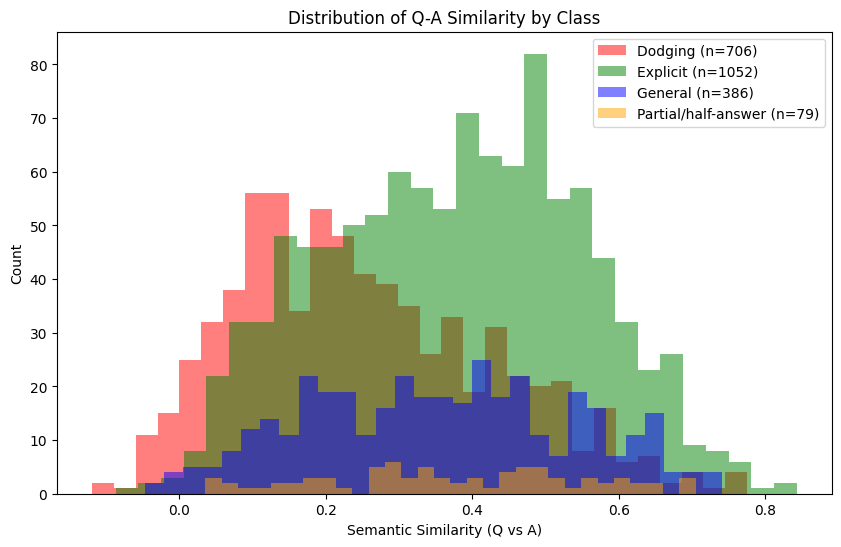


Class separation analysis:
Dodging: min=-0.118, max=0.775, median=0.225
Explicit: min=-0.087, max=0.843, median=0.383
General: min=-0.047, max=0.741, median=0.355
Partial/half-answer: min=0.036, max=0.705, median=0.363


In [5]:
import matplotlib.pyplot as plt

model = SentenceTransformer("all-MiniLM-L6-v2")

all_sims = {label: [] for label in FOUR_CLASSES}

for label in FOUR_CLASSES:
    subset = df[df["label"] == label]
    for _, row in subset.iterrows():
        q_emb = model.encode(str(row["question"]))
        a_emb = model.encode(str(row["interview_answer"])[:1000])
        sim = 1 - cosine(q_emb, a_emb)
        all_sims[label].append(sim)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'orange']
for label, color in zip(FOUR_CLASSES, colors):
    ax.hist(all_sims[label], bins=30, alpha=0.5,
            label=f"{label} (n={len(all_sims[label])})", color=color)

ax.set_xlabel("Semantic Similarity (Q vs A)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Q-A Similarity by Class")
ax.legend()
plt.show()

print("\nClass separation analysis:")
for label in FOUR_CLASSES:
    sims = all_sims[label]
    print(f"{label}: min={min(sims):.3f}, max={max(sims):.3f}, median={np.median(sims):.3f}")

In [ ]:
general = df[df["label"] == "General"]
partial = df[df["label"] == "Partial/half-answer"]

print("GENERAL vs PARTIAL comparison:")

print(f"\nAnswer length (words):")
print(
    f"  General: {general['interview_answer'].str.split().str.len().mean():.1f}")
print(
    f"  Partial: {partial['interview_answer'].str.split().str.len().mean():.1f}")

print(f"\nQuestion length (words):")
print(f"  General: {general['question'].str.split().str.len().mean():.1f}")
print(f"  Partial: {partial['question'].str.split().str.len().mean():.1f}")

# Uses 'I'
i_pattern = r'\bi\b'
gen_i = general['interview_answer'].str.lower(
).str.contains(i_pattern).mean()*100
par_i = partial['interview_answer'].str.lower(
).str.contains(i_pattern).mean()*100
print(f"\nUses 'I' in answer:")
print(f"  General: {gen_i:.1f}%")
print(f"  Partial: {par_i:.1f}%")

# Uses 'we'
we_pattern = r'\bwe\b'
gen_we = general['interview_answer'].str.lower(
).str.contains(we_pattern).mean()*100
par_we = partial['interview_answer'].str.lower(
).str.contains(we_pattern).mean()*100
print(f"\nUses 'we' in answer:")
print(f"  General: {gen_we:.1f}%")
print(f"  Partial: {par_we:.1f}%")

# Check hedges
hedges = ["maybe", "perhaps", "possibly", "might", "could", "somewhat"]
gen_hedge = general['interview_answer'].str.lower().apply(
    lambda x: any(h in x for h in hedges)).mean()*100
par_hedge = partial['interview_answer'].str.lower().apply(
    lambda x: any(h in x for h in hedges)).mean()*100
print(f"\nContains hedges:")
print(f"  General: {gen_hedge:.1f}%")
print(f"  Partial: {par_hedge:.1f}%")

# Check if answer contains numbers/specifics
gen_nums = general['interview_answer'].str.contains(r'\d+').mean()*100
par_nums = partial['interview_answer'].str.contains(r'\d+').mean()*100
print(f"\nContains numbers:")
print(f"  General: {gen_nums:.1f}%")
print(f"  Partial: {par_nums:.1f}%")

# Check "but" usage (Partial might have more "but" for incomplete answers)
but_pattern = r'\bbut\b'
gen_but = general['interview_answer'].str.lower(
).str.contains(but_pattern).mean()*100
par_but = partial['interview_answer'].str.lower(
).str.contains(but_pattern).mean()*100
print(f"\nContains 'but':")
print(f"  General: {gen_but:.1f}%")
print(f"  Partial: {par_but:.1f}%")

GENERAL vs PARTIAL comparison:

Answer length (words):
  General: 336.0
  Partial: 357.5

Question length (words):
  General: 15.3
  Partial: 21.3

Uses 'I' in answer:
  General: 88.6%
  Partial: 88.6%

Uses 'we' in answer:
  General: 85.8%
  Partial: 86.1%

Contains hedges:
  General: 36.5%
  Partial: 35.4%

Contains numbers:
  General: 40.4%
  Partial: 41.8%

Contains 'but':
  General: 74.4%
  Partial: 74.7%


In [9]:
# Check for multi-part questions
print("Multi-part question indicators:")

# Questions with "and"
and_pattern = r'\band\b'
gen_and = general['question'].str.lower().str.contains(and_pattern).mean()*100
par_and = partial['question'].str.lower().str.contains(and_pattern).mean()*100
print(f"\nQuestion contains 'and':")
print(f"  General: {gen_and:.1f}%")
print(f"  Partial: {par_and:.1f}%")

# Questions with multiple question marks
gen_multi_q = general['question'].str.count(r'\?').gt(1).mean()*100
par_multi_q = partial['question'].str.count(r'\?').gt(1).mean()*100
print(f"\nMultiple '?' in question:")
print(f"  General: {gen_multi_q:.1f}%")
print(f"  Partial: {par_multi_q:.1f}%")

# Question word count > 20
gen_long_q = (general['question'].str.split().str.len() > 20).mean()*100
par_long_q = (partial['question'].str.split().str.len() > 20).mean()*100
print(f"\nQuestion > 20 words:")
print(f"  General: {gen_long_q:.1f}%")
print(f"  Partial: {par_long_q:.1f}%")

# Show some actual examples side by side
print("\n" + "="*80)
print("EXAMPLE COMPARISON")
print("="*80)

print("\n--- GENERAL Examples ---")
gen_samples = general.sample(3, random_state=42)
for _, row in gen_samples.iterrows():
    print(f"Q ({len(row['question'].split())} words): {row['question'][:150]}")
    print(f"A: {row['interview_answer'][:200]}...")
    print()

print("\n--- PARTIAL Examples (complex questions) ---")
par_samples = partial.sample(3, random_state=42)
for _, row in par_samples.iterrows():
    print(f"Q ({len(row['question'].split())} words): {row['question'][:150]}")
    print(f"A: {row['interview_answer'][:200]}...")
    print()

Multi-part question indicators:

Question contains 'and':
  General: 22.8%
  Partial: 49.4%

Multiple '?' in question:
  General: 1.3%
  Partial: 20.3%

Question > 20 words:
  General: 21.8%
  Partial: 44.3%

EXAMPLE COMPARISON

--- GENERAL Examples ---
Q (8 words): Request for permission to ask a follow-up question.
A: Maybe. []...

Q (16 words): Is the Republican Party in the desperate straits that Arlen Specter seems to think it is?
A: You know, politics in America changes very quick, and I'm a big believer that things are never as good as they seem and never as bad as they seem. You're talking to a guy who was 30 points down in the...

Q (8 words): What is your agenda in the G-7 Presidency?
A: Oh, we're going to do something, hopefully, special. We're going to build on what we have now. We've built on something really good. And we're going to be going in with some great unity. We really did...


--- PARTIAL Examples (complex questions) ---
Q (22 words): Mr. President, what are your